**PART-1**

In [ ]:
import networkx as nx
import warnings
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
warnings.filterwarnings('ignore')

matplotlib inline : график зургийг шууд тухайн нөөгдсөн cell доор гаргах зориулалттай команд.

In [ ]:
%matplotlib inline

 Yр дүн : графийн бүтцийг үүсгэж, нодын холболт болон шинж чанаруудыг (жишээ нь, байрлал буюу "house") өгөгдлөөс хадгалах бөгөөд графийн дүрслэлийг тооцоолж гаргах юм.

In [ ]:
import networkx as nx  # NetworkX импортлох, графийн өгөгдлүүдийг боловсруулахад ашиглагддаг.
import os  # Тухайн файлын замуудтай ажиллах модуль.

#file paths
nodes_csv = "/content/asoiaf-book1-nodes.csv"  # Нодын (төрөл бүрийн өгөгдлийн) CSV файл.
edges_csv = "/content/asoiaf-book1-edges.csv"  # Холболтын CSV файл.

def read_net(edges_path):
    g = nx.Graph()  # NetworkX-граф үүсгэх
    with open(edges_path, "r") as f:  # Холболтын CSV файл нээж унших
        f.readline()  # Анхны мөр (хедер)ыг хаяна
        for line in f:  # Бүх мөрийг уншиж, граф дээр холболт (edge) нэмэх
            nodes = line.strip().split(",")  # Мөрийг заагчийг нь (",") хуваах
            if len(nodes) >= 2:  # 2 ба түүнээс олон утга байгаа бол
                g.add_edge(nodes[0].strip(), nodes[1].strip())  # Холболтыг (edge) граф руу нэмэх
    return g  # Графийг буцаах

#(Өгөгдлийг унших)
g = read_net(edges_csv)  # Холболтын файл уншиж, граф үүсгэх

#(House 정보) (Нодын шинж чанарыг нэмэх, энэ тохиолдолд 'house' мэдээлэл)
houses = {}  # Нодын байр (house) мэдээллийг хадгалах толь
if os.path.exists(nodes_csv):  # Файл орших эсэхийг шалгах
    with open(nodes_csv, "r") as f:  # Нодын CSV файл унших
        f.readline()  # Анхны мөрийг хаяна
        for line in f:  # Бүх мөрийг уншиж, тухайн нодын хүндэтгэлийг хадгалах
            parts = line.strip().split(",")  # Мөрийг заагчийг нь хуваах
            if len(parts) >= 3:  # 3 ба түүнээс олон утга байгаа бол
                node, _, house = parts  # Нод болон байр (house)-г авах
                houses[node] = house  # Нод ба байр мэдээллийг хадгалах
                if node in g.nodes:  # Хэрэв энэ нод графд байгаа бол
                    g.nodes[node]["house"] = house  # Нодын 'house' шинж чанарыг нэмэх

# График дүрслэлийн хувьд нодын байрлал тохируулах
if len(g.nodes) > 0:  # Граф дээр нод байна уу?
    pos = nx.spring_layout(g)  # Нодын байрлалыг spring layout ашиглан тооцоолох


In [ ]:
from google.colab import drive  # Google Colab-д Drive-ийг холбох модулыг импортлох
drive.mount('/content/drive')  # Google Drive-ыг "/content/drive" path холбох

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NetworkX графыг дүрслэхэд ашиглагддаг бөгөөд "draw_net" функц нь тодорхой граф (G), нодын байрлал (pos), хэмжигдэхүүнүүд (measures) болон хэмжигдэхүүний нэр (measure_name) ашиглан графийг өнгөөр дүрслэх боломжийг олгодог.

**Centrality measures**

Centrality measures нь графын нодын төвшинг тодорхойлох арга юм. Графын нодын төвшин нь тухайн нод нь сүлжээний бүтцэд хэр чухал, нөлөөтэй болохыг илэрхийлнэ. Графын төвшинг хэмжих олон арга байдаг бөгөөд эдгээр нь тухайн нодыг граф дотор хамгийн чухал, холбоотой эсвэл мэдээлэл дамжуулах үүрэгтэй болохыг хэмжихэд хэрэглэгддэг.

In [ ]:
def draw_net(G, pos, measures, measure_name):
    plt.figure(figsize=(10, 10))  # Графикийг 10x10 хэмжээтэй зураглал хийх

    # zangilaag dursleh
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma,  # Нодын хэмжээ, өнгөний схем
                                   node_color=list(measures.values()),  # Нодын өнгийг measures-ийн утгаар тохируулах
                                   nodelist=measures.keys())  # measures-ийн түлхүүрүүдийг ашиглан зөвхөн эдгээр нодыг дүрслэх

    # Өнгөний хэмжээг тохируулах (SymLogNorm)
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))  # Өнгөний хамаарлыг тохируулах

    # Нодын нэрсийг дүрслэх
    labels = nx.draw_networkx_labels(G, pos)  # Нодын нэрсийг байрлуулна

    # Эдгүүдийг дүрслэх
    edges = nx.draw_networkx_edges(G, pos, alpha=0.2)  # Эдгүүдийн харагдах байдлыг тохируулах (transparency)

    # Графикийн гарчиг
    plt.title(measure_name)  # Графикт байрлах гарчиг

    # Өнгөний масштабтай цолбар гаргах
    plt.colorbar(nodes)  # Нодын өнгийн спектрийг нэмэх (харгалзах өнгөний диаграм)

**Degree Centrality**

Degree Centrality гэдэг нь сүлжээний графын хамгийн энгийн ба чухал төвлөрөл хэмжигдэхүүнийг илэрхийлдэг нэг төрлийн төвлөрөл. Энэ нь тухайн зангилааны (node) хэдэн шууд холболт (edge) байгаа болохыг харуулдаг. Энгийнээр хэлбэл, тухайн зангилааг тойрч буй бусад зангилаатай ямар олон шууд холбоо тогтоосон байгааг тоолох замаар тухайн зангилааны "чухал байдал"-ийг хэмждэг.

In [ ]:
degrees = dict(g.degree()) # compute the degree of a set of nodes (if specified).

In [ ]:
# Төвлөрөлт (degree centrality)-ийн утгуудыг багасах дарааллаар сортлож, хамгийн төвлөрөлттэй 5 зангилааг гаргах
ranks = [(k, v) for k, v in sorted(degrees.items(), key=lambda item: -item[1])]
ranks[0:5]  # Эхний 5 төвлөрөлттэй зангилаа

[('Eddard-Stark', 66),
 ('Robert-Baratheon', 50),
 ('Tyrion-Lannister', 46),
 ('Catelyn-Stark', 43),
 ('Jon-Snow', 37)]

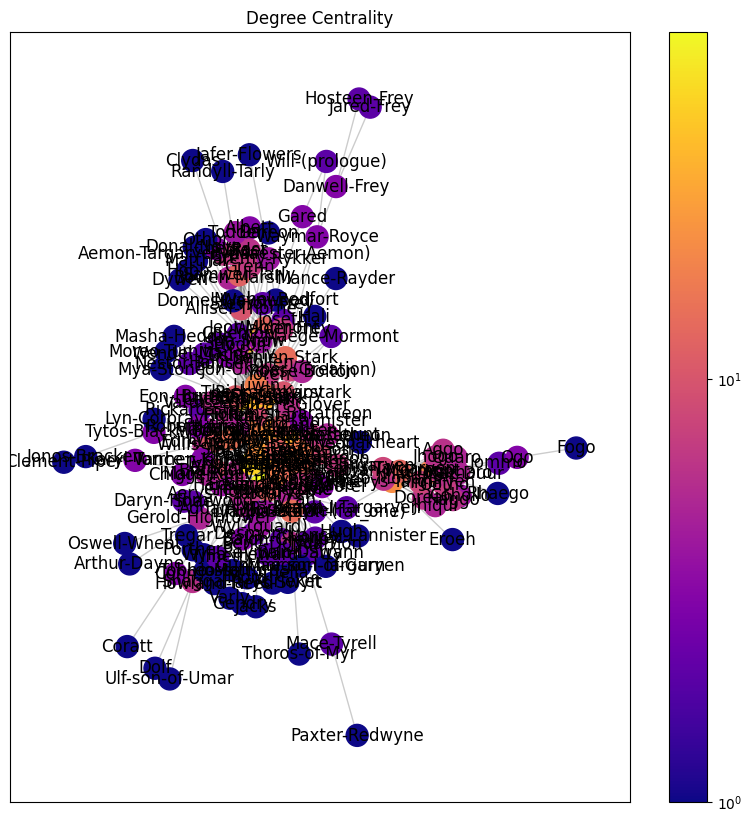

In [ ]:
# Графын сүлжээг зурж, тухайн зангилаануудын төвлөрөлт (degree centrality) үзүүлэлтийг харуулж байна
draw_net(g, pos, degrees, 'Degree Centrality')  # 'g' нь граф, 'pos' нь зангилаануудын байрлал, 'degrees' нь төвлөрөлтийн утгууд

**Closeness Centrality**

**Тодорхойлолт:**

Closeness Centrality нь тухайн зангилаа бүх бусад зангилаануудтай хэр ойр байрладаг, эсвэл хэр хурдан хүрч болохыг хэмжих хэрэгсэл юм. Энгийнээр хэлбэл, тухайн зангилааны хүрэх чадварыг хэмждэг.

Сул холболттой буюу зай ихтэй зангилаа нь холбогдох боломж багатай учраас түүний closeness centrality нь бага байх болно.

Тооцоолол:

Closeness centrality-г тооцоолохдоо тухайн зангилааны бүх бусад зангилаатай хамгийн богино замын уртыг нийлбэрлэдэг. Харин түүний closeness centrality нь энэхүү нийлбэрийн эсрэг утгаар илэрхийлэгддэг. Тиймээс хамгийн ойрхон зангилаа нь хамгийн өндөр closeness centrality-тай байх болно.

In [ ]:
# Closeness centrality-г тооцоолох
closeness = nx.closeness_centrality(g)

In [ ]:
# Closeness centrality-г сортолж, хамгийн өндөр утгатай 5 зангилааг авах
ranks = [(k, v) for k, v in sorted(closeness.items(), key=lambda item: -item[1])]
print(ranks[0:5])  # Эхний 5 зангилаа, хамгийн өндөр closeness centrality-тай

[('Eddard-Stark', 0.5636363636363636), ('Robert-Baratheon', 0.5454545454545454), ('Tyrion-Lannister', 0.510989010989011), ('Catelyn-Stark', 0.5054347826086957), ('Robb-Stark', 0.49732620320855614)]


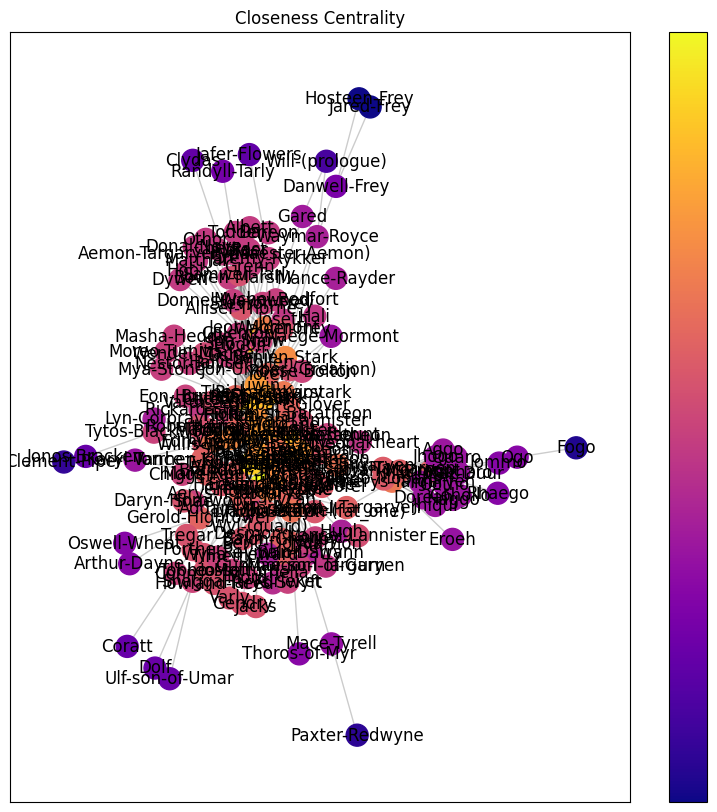

In [ ]:
# Графыг зурж, Closeness Centrality-ийг тэмдэглэх
draw_net(g, pos, closeness, 'Closeness Centrality')

**Betweenness Centrality**

Тодорхойлолт:

Betweenness Centrality нь тухайн зангилаа бусад зангилаануудын хоорондох хамгийн богино замд "дамжин өнгөрөх" хэд хэдэн замууд дээр орсон бол хэр чухал үүрэг гүйцэтгэж байгааг илэрхийлдэг. Энэ нь тухайн зангилаа сүлжээнд өөрийн байр суурийг хэр хүчтэйгээр хадгалагдаж байгааг, мөн бусад зангилаануудын хоорондох харилцааг хэр хянаж байгаа гэдгийг харуулна.

Тооцоолол:

Betweenness Centrality-г тооцоолохдоо тухайн зангилааг дамжин өнгөрөх хамгийн богино замуудын тоог тоолж, бүх боломжит хос зангилаануудын хоорондох хамгийн богино зам дээр тус зангилаа хэдэн удаа ордог вэ гэдгийг тооцоолно. Тэгэхээр энэ хэмжигдэхүүн нь тухайн зангилаа сүлжээний бусад хэсэгт хэр нөлөөтэй болохыг харуулдаг.

In [ ]:
# Betweenness centrality-г тооцоолох
betweenness = nx.betweenness_centrality(g)

In [ ]:
# Betweenness centrality-ийн утгуудыг сортолж, хамгийн өндөр утгатай 5 зангилааг авах
ranks = [(k, v) for k, v in sorted(betweenness.items(), key=lambda item: -item[1])]
print(ranks[0:5])  # Эхний 5 зангилаа, хамгийн өндөр betweenness centrality-тай

[('Eddard-Stark', 0.2696038913836117), ('Robert-Baratheon', 0.21403028397371796), ('Tyrion-Lannister', 0.1902124972697492), ('Jon-Snow', 0.17158135899829566), ('Catelyn-Stark', 0.1513952715347627)]


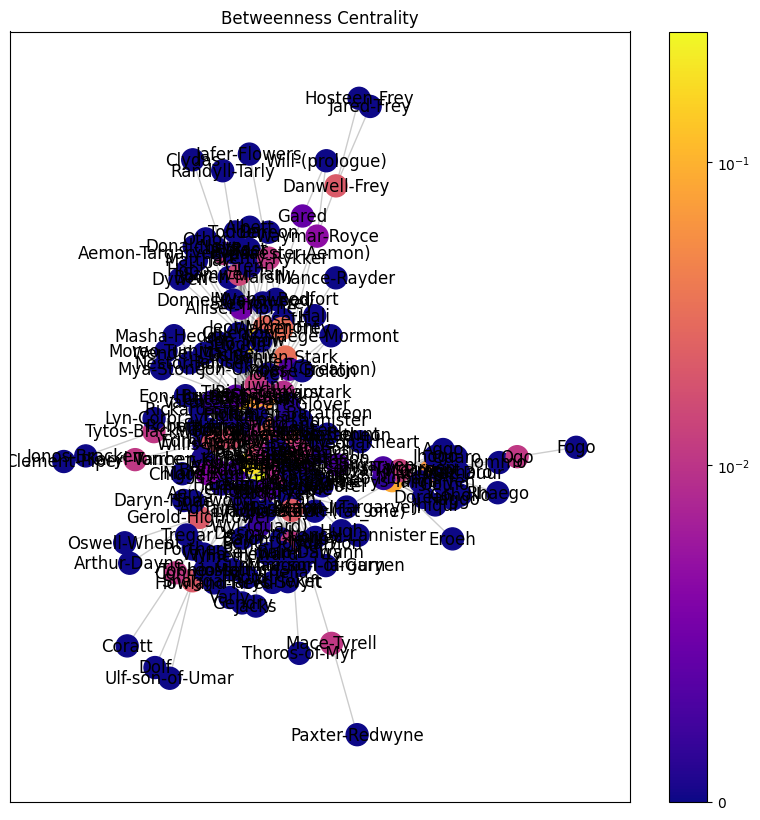

In [ ]:
# Графыг зурж, Betweenness Centrality-ийг тэмдэглэх
draw_net(g, pos, betweenness, 'Betweenness Centrality')

**Harmonic Centrality**

Тодорхойлолт:

Harmonic Centrality нь тухайн зангилааг бусад зангилаануудаас хэр хурдан холбож чадахыг, ба холболтын хамгийн богино замын уртыг хамгийн багадаа нэгтэй харьцуулсан байдлаар тооцдог. Энэ арга нь бүрэн холболтгүй сүлжээг сайтар шийдэхэд тохиромжтой бөгөөд тус зангилааг холбогдох бүх бусад зангилаануудад хэр хурдан хүрч чадахыг илүү нарийн тооцоолно.

Тооцоолол:

Harmonic Centrality-г тооцоолохдоо тухайн зангилаа (node) болон бусад зангилаануудын хоорондох хамгийн богино замын уртыг авч үздэг. Түүний harmonic centrality нь эдгээр уртуудын энгийн нийлбэрийн оронд эдгээр замуудын хармоник нийлбэр (1/зам) дээр үндэслэгдэнэ.

Хармоник нийлбэр нь тухайн замыг богиносгох нь чухал гэж үздэг бөгөөд энэ нь холболтын урт урттай бол бага, богино байвал илүү их ач холбогдол өгдөг.

In [ ]:
# Harmonic centrality-г тооцоолох
harmonic = nx.harmonic_centrality(g)

In [ ]:
# Harmonic centrality-ийн утгуудыг сортолж, хамгийн өндөр утгатай 5 зангилааг авах
ranks = [(k, v) for k, v in sorted(harmonic.items(), key=lambda item: -item[1])]
print(ranks[0:5])  # Эхний 5 зангилаа, хамгийн өндөр harmonic centrality-тай

[('Eddard-Stark', 122.3333333333333), ('Robert-Baratheon', 115.0833333333333), ('Tyrion-Lannister', 110.08333333333331), ('Catelyn-Stark', 108.24999999999996), ('Jon-Snow', 104.91666666666664)]


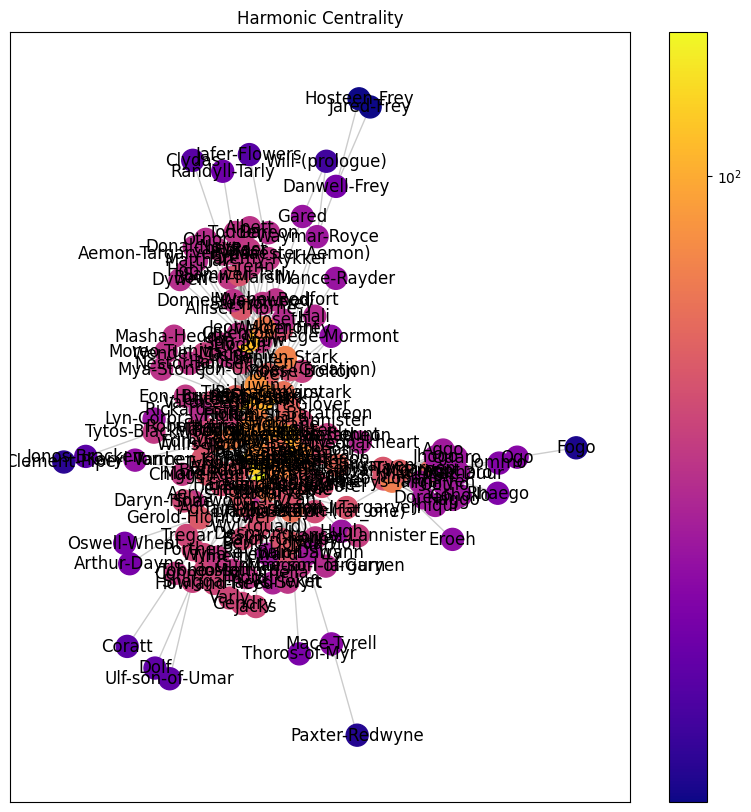

In [ ]:
# Графыг зурж, Harmonic Centrality-ийг тэмдэглэх
draw_net(g, pos, harmonic, 'Harmonic Centrality')

**PageRank**

Тодорхойлолт:

PageRank-ийг тооцоолохдоо вэб хуудас бүрийн чухал байдал бусад вэб хуудас руу чиглэсэн линкүүд (холболт)-ийн тоо, чанараар тодорхойлогддог. Энэ нь тухайн вэб хуудас руу олон чухал вэб хуудас холбогдсон байх тусам түүний PageRank өндөр байх болно.

Тооцоолол:

PageRank-ийг тооцоолох арга нь бие даасан давтагдах тооцоо буюу iteration зарчим дээр суурилдаг. Вэб хуудас бүрийн PageRank нь дараах шинж чанартай тооцогддог:

Линкүүдийн тоо:

Хэрэв вэб хуудас олон холболттой бол түүний PageRank өндөр байх болно.

Линкүүдийн чанар:

Тухайн хуудас руу холбогдож буй вэб хуудас нь олон холболттой, эсвэл өндөр PageRank-тэй байх нь чухал.
Өөрөөр хэлбэл, PageRank-ийг тооцоолохдоо вэб хуудас тус бүрийн PageRank нь өөрийн хуудас руу чиглэсэн линкүүдээс хамаарч тодорхойлогддог, мөн эдгээр линкүүдийн эзэмшигч хуудаснуудын чухал байдал (PageRank) нь нөлөөтэй.

In [ ]:
# PageRank-ийг тооцоолох
pagerank = nx.pagerank(g)

In [ ]:
# PageRank-ийн утгуудыг сортолж, хамгийн өндөр утгатай 5 зангилааг авах
ranks = [(k, v) for k, v in sorted(pagerank.items(), key=lambda item: -item[1])]
print(ranks[0:5])  # Эхний 5 зангилаа, хамгийн өндөр PageRank-тай

[('Eddard-Stark', 0.04550213151218522), ('Tyrion-Lannister', 0.03301449867019286), ('Catelyn-Stark', 0.030189729639356143), ('Robert-Baratheon', 0.02982527420823678), ('Jon-Snow', 0.026840579868198603)]


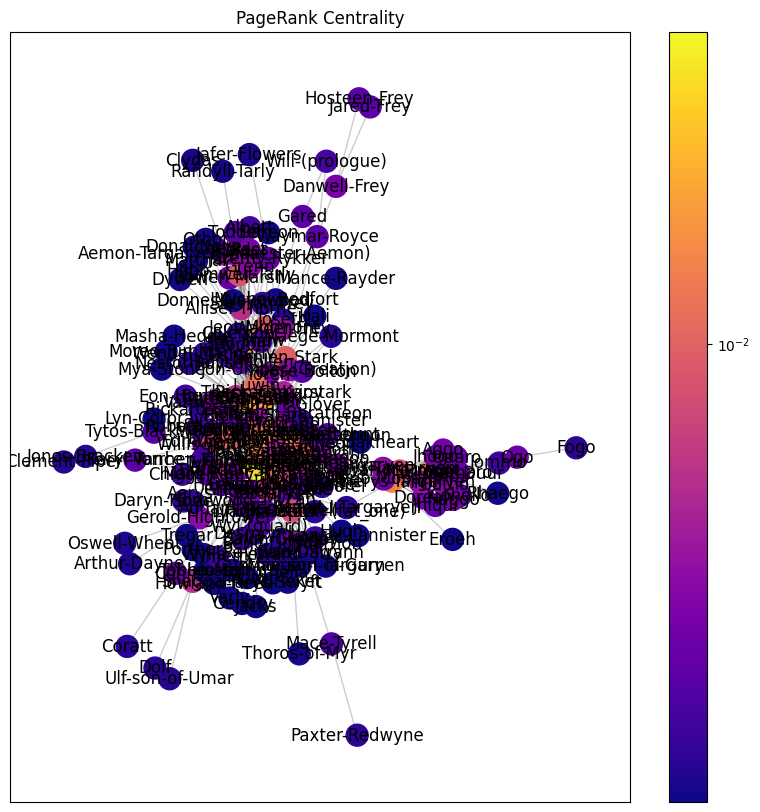

In [ ]:
# Графыг зурж, PageRank Centrality-ийг тэмдэглэх
draw_net(g, pos, pagerank, 'PageRank Centrality')

**Eigenvector Centrality**

Тодорхойлолт:

Eigenvector Centrality нь тухайн зангилааг холбогдож буй зангилаануудын чухал байдал дээр үндэслэн хэмждэг. Энд гол санаа нь нэг зангилаа их чухал зангилаатай холбогдож байвал, тухайн зангилааны Eigenvector Centrality өндөр байх болно. Үүний адилаар, хэрэв зангилаа зөвхөн бага чухал зангилаануудтай холбогдсон бол түүний Eigenvector Centrality бага байх болно.

Тооцоолол:

Eigenvector Centrality нь eigengector гэж нэрлэгддэг матрицын онцлог вектор дээр суурилдаг. Энэ нь тухайн зангилаа өөрийн холбогдож буй зангилаануудын чухал байдал (tөрөл, тэдний холболтуудын чухал байдал)-д хэр их нөлөө үзүүлж байгааг тооцоолдог.

Eigenvector Centrality-г тооцоолохдоо тухайн зангилааны холболт болон түүний холбогдож буй бусад зангилаануудын холбоосуудын чухал байдлыг тусгах матрицийн онцлог утгууд ашиглагддаг.

Тухайн зангилаа хэдий чинээ олон чухал зангилаатай холбогдсон байвал түүний Eigenvector Centrality өндөр байх болно.

In [ ]:
# Eigenvector centrality-г тооцоолох
eigen = nx.eigenvector_centrality(g)

In [ ]:
# Eigenvector centrality-ийн утгуудыг сортолж, хамгийн өндөр утгатай 5 зангилааг авах
ranks = [(k, v) for k, v in sorted(eigen.items(), key=lambda item: -item[1])]
print(ranks[0:5])  # Эхний 5 зангилаа, хамгийн өндөр eigenvector centrality-тай

[('Eddard-Stark', 0.2964089387184345), ('Robert-Baratheon', 0.2694880017758137), ('Sansa-Stark', 0.23155019835665291), ('Tyrion-Lannister', 0.22520388145217876), ('Joffrey-Baratheon', 0.22075394589376893)]


In [ ]:
# Эхний 5 элементийг авч үзэх
print(ranks[0:5])

[('Eddard-Stark', 0.2964089387184345), ('Robert-Baratheon', 0.2694880017758137), ('Sansa-Stark', 0.23155019835665291), ('Tyrion-Lannister', 0.22520388145217876), ('Joffrey-Baratheon', 0.22075394589376893)]


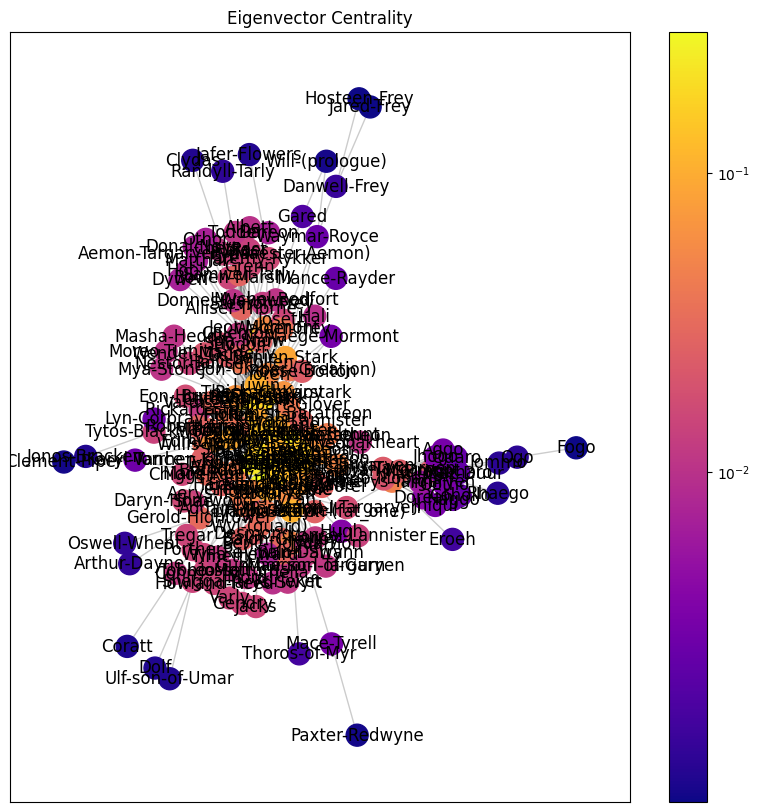

In [ ]:
# Графыг зурж, Eigenvector Centrality-ийг тэмдэглэх
draw_net(g, pos, eigen, 'Eigenvector Centrality')

In [ ]:
import networkx as nx

# Граф үүсгэх (жишээ)
g = nx.erdos_renyi_graph(10, 0.3)

# Граф дээрх зангилаануудын дунд зэргийн хөршийн зэргийг тооцоолох
knn = nx.average_neighbor_degree(g)

# Результат-г зангилааны нэрийн дагуу сортлох
knn = dict(sorted(knn.items()))

# Результатыг хэвлэх
print(knn)

{0: 4.666666666666667, 1: 3.8, 2: 5.0, 3: 3.6, 4: 4.0, 5: 4.333333333333333, 6: 3.6666666666666665, 7: 3.5, 8: 4.0, 9: 5.5}


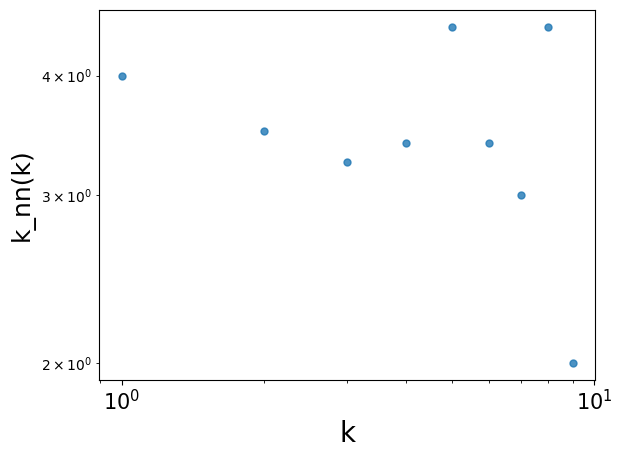

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Граф үүсгэх (жишээ)
g = nx.erdos_renyi_graph(10, 0.3)

# Граф дээрх зангилаануудын дунд зэргийн хөршийн зэргийг тооцоолох
knn = nx.average_neighbor_degree(g)

# Графикийг логарифм масштабтайгаар зурж, харах
plt.plot(list(knn.keys()), list(knn.values()), '.', ms=10, alpha=0.8)
plt.loglog()  # Логарифм масштабаар үзүүлэх
plt.xlabel("k", fontsize=20)
plt.ylabel("k_nn(k)", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**PART-2**

In [ ]:
import networkx as nx  # Networkx номын санг график үүсгэх, шинжлэх, дүрслэхэд ашиглана
import pandas as pd  # Pandas номын санг өгөгдлийн хүрээтэй ажиллахад ашиглана

# Тохиромжгүй график үүсгэх
G = nx.Graph()  # Undirected график үүсгэх
edges = [(1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 5)]  # Ирмэгүүдийн жагсаалт
G.add_edges_from(edges)  # Ирмэгүүдийг графикт нэмэх

# Градийн төвшний хүндийг тооцоолох
degree_centrality = nx.degree_centrality(G)

# Үр дүнг хэвлэх
print("Тамирчингүй графикт градийн төвшний хүндийн үр дүн:")
for node, centrality in degree_centrality.items():
    print(f"Зангилаа {node}: {centrality}")  # Зангилааны хүндийг хэвлэх

# Чиглэлтэй график үүсгэх
DG = nx.DiGraph()  # Directed график үүсгэх
edges = [(1, 2), (2, 3), (3, 1), (3, 4), (4, 5)]  # Ирмэгүүдийн жагсаалт
DG.add_edges_from(edges)  # Ирмэгүүдийг чиглэлтэй графикт нэмэх

# Орсон ба гарсан градийн түвшний хүндийг тооцоолох
in_degree_centrality = nx.in_degree_centrality(DG)  # Орсон градийн түвшний хүндийг
out_degree_centrality = nx.out_degree_centrality(DG)  # Гарсан градийн түвшний хүндийг

# Үр дүнг хэвлэх
print("\nЧиглэлтэй графикт орсон градийн төвшний хүндийн үр дүн:")
for node, centrality in in_degree_centrality.items():
    print(f"Зангилаа {node}: {centrality}")  # Зангилааны орсон градийн хүндийг хэвлэх

print("\nЧиглэлтэй графикт гарсан градийн төвшний хүндийн үр дүн:")
for node, centrality in out_degree_centrality.items():
    print(f"Зангилаа {node}: {centrality}")  # Зангилааны гарсан градийн хүндийг хэвлэх

# Жишээ өгөгдлийн багц унших (файлын байршлыг зөв шалгаарай)
try:
    df = pd.read_csv("twitter_network.csv")  # Жишээ файл

    # Чиглэлтэй график үүсгэх
    twitter_graph = nx.from_pandas_edgelist(df, source="source", target="target", create_using=nx.DiGraph())  # Twitter сүлжээний график

    # Градийн түвшний хүндийг тооцоолох
    degree_centrality = nx.degree_centrality(twitter_graph)

    # Топ 10 нөлөө бүхий хэрэглэгчийг олох
    top_influencers = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

    print("\nГрадийн төвшний хүндийн дагуу Топ 10 Нөлөө бүхий Хэрэглэгчид:")
    for node, centrality in top_influencers:
        print(f"Хэрэглэгч {node}: {centrality}")  # Топ 10 хэрэглэгчийн хүндийг хэвлэх

except FileNotFoundError:
    print("\nАлдаа: 'twitter_network.csv' файл олдсонгүй. Зөв байршилыг оруулна уу.")  # Хэрэв файл олдохгүй бол алдааг хэвлэх


Тамирчингүй графикт градийн төвшний хүндийн үр дүн:
Зангилаа 1: 0.5
Зангилаа 2: 0.75
Зангилаа 3: 0.75
Зангилаа 4: 0.75
Зангилаа 5: 0.25

Чиглэлтэй графикт орсон градийн төвшний хүндийн үр дүн:
Зангилаа 1: 0.25
Зангилаа 2: 0.25
Зангилаа 3: 0.25
Зангилаа 4: 0.25
Зангилаа 5: 0.25

Чиглэлтэй графикт гарсан градийн төвшний хүндийн үр дүн:
Зангилаа 1: 0.25
Зангилаа 2: 0.25
Зангилаа 3: 0.5
Зангилаа 4: 0.25
Зангилаа 5: 0.0

Градийн төвшний хүндийн дагуу Топ 10 Нөлөө бүхий Хэрэглэгчид:
Хэрэглэгч user1: 0.2857142857142857
Хэрэглэгч user2: 0.2857142857142857
Хэрэглэгч user7: 0.2857142857142857
Хэрэглэгч user3: 0.2857142857142857
Хэрэглэгч user4: 0.2857142857142857
Хэрэглэгч user5: 0.2857142857142857
Хэрэглэгч user6: 0.2857142857142857
Хэрэглэгч user8: 0.2857142857142857


Энэхүү код нь график болон сүлжээний шинжилгээ хийхэд ашиглагддаг NetworkX номын санг ашиглан хоёр төрлийн график үүсгэж, тэдгээрийн зангилаануудын градийн төвшний хүндийг тооцоолох болон өгөгдлийн файлыг ашиглан сүлжээний нөлөө бүхий хэрэглэгчдийг илрүүлэх боломжийг олгодог.

Тохиромжгүй график:

Энд undirected график үүсгэж, зангилаануудын хоорондох ирмэгүүдийн хүндийг тооцоолж, тухайн хүндийн дагуу зангилаануудын чухал байдлыг гаргадаг.


Чиглэлтэй график:

Чиглэлтэй график үүсгэж, орсон болон гарсан градийн төвшний хүндийг тус бүр тооцоолсон. Энэ нь чиглэлтэй сүлжээнүүдийн дотоод үйл ажиллагааг илүү сайн ойлгоход тусалдаг.

Сүлжээний нөлөө бүхий хэрэглэгчид:

CSV файлыг ашиглан жишээ өгөгдлийн сүлжээг уншиж, топ 10 нөлөө бүхий хэрэглэгчийг тодорхойлох боломжтой болсон. Энэ нь олон нийтийн сүлжээнүүдийн шинжилгээнд чухал үүрэгтэй байж, хэрэглэгчдийн харилцан үйлчлэл болон нөлөөний бүтэцтэй холбогдсон мэдээллийг авчирдаг.

Эцэст нь, код нь pandas номын сангаар өгөгдлийг удирдах, мөн NetworkX-г ашиглан график үүсгэж, сүлжээний шинжилгээ хийх аргачлалын үндсийг харуулсан жишээ болж байна. Энэ нь сүлжээний шинжилгээ, нийгмийн сүлжээний анализ зэрэг олон төрлийн хэрэглээнд ашиглагдах боломжтой.